In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import dataset
df = pd.read_csv('salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M


## Data Validation
Let's validate few features of the dataset...

In [3]:
# shape of dataset
print(f"The dataset has {df.shape[0]} observations and {df.shape[1]} variable(features)")

The dataset has 7974 observations and 11 variable(features)


In [4]:
# structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7974 entries, 0 to 7973
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           7974 non-null   int64 
 1   experience_level    7974 non-null   object
 2   employment_type     7974 non-null   object
 3   job_title           7974 non-null   object
 4   salary              7974 non-null   int64 
 5   salary_currency     7974 non-null   object
 6   salary_in_usd       7974 non-null   int64 
 7   employee_residence  7974 non-null   object
 8   remote_ratio        7974 non-null   int64 
 9   company_location    7974 non-null   object
 10  company_size        7974 non-null   object
dtypes: int64(4), object(7)
memory usage: 685.4+ KB


In [5]:
df['experience_level'].value_counts()

SE    5754
MI    1546
EN     429
EX     245
Name: experience_level, dtype: int64

In [6]:
# validate experience level
print(df['experience_level'].unique())
df['experience_level'].value_counts()

['SE' 'MI' 'EN' 'EX']


SE    5754
MI    1546
EN     429
EX     245
Name: experience_level, dtype: int64

In [7]:
# validate job type
print(f"Unique values: {df['employment_type'].unique()}")
df['employment_type'].value_counts()

Unique values: ['FT' 'CT' 'PT' 'FL']


FT    7932
CT      18
PT      13
FL      11
Name: employment_type, dtype: int64

## EDA

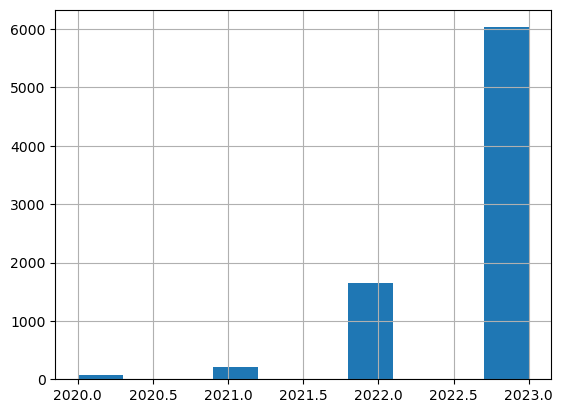

In [8]:
# Work years distribution
df['work_year'].hist();

In [9]:
# plot the bar charts of the various years
print(f"Start year: {df['work_year'].min()}")
print(f"End year: {df['work_year'].max()}")

Start year: 2020
End year: 2023


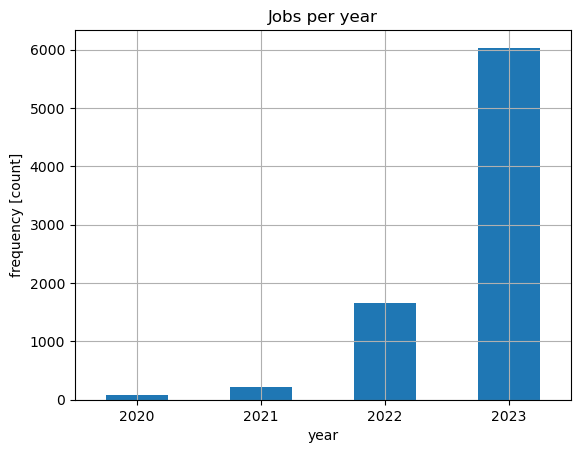

In [10]:
# value count
work_year = df['work_year'].value_counts()
# plot
work_year.sort_values().plot.bar()
# label the chart
plt.xlabel('year')
plt.ylabel('frequency [count]')
plt.title('Jobs per year')
plt.grid()
plt.xticks(rotation = 0);

In [11]:
w_y = df['work_year'].value_counts()
w_y.sort_values()

2020      75
2021     218
2022    1650
2023    6031
Name: work_year, dtype: int64

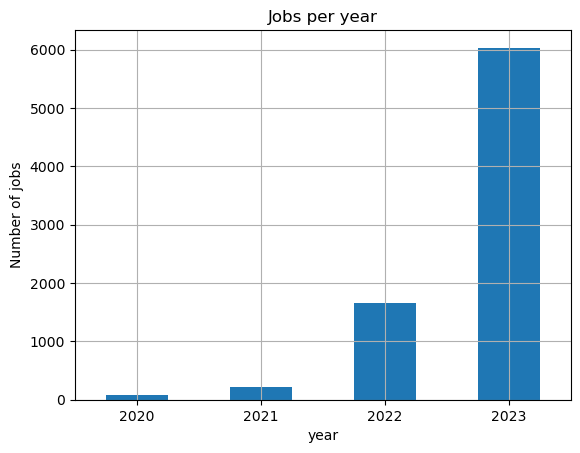

In [12]:
w_y.sort_values().plot.bar()
# label chart
plt.xlabel('year')
plt.ylabel('Number of jobs')
plt.title('Jobs per year')
plt.grid()
plt.xticks(rotation = 0);

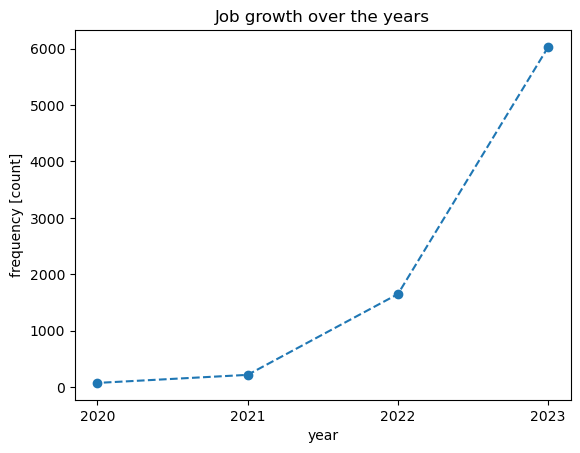

In [13]:
# visualize job growth over the years
work_year.plot(linestyle = '--', marker = 'o')
# label chart
plt.xlabel('year')
plt.ylabel('frequency [count]')
plt.title('Job growth over the years')

plt.xticks([2020, 2021, 2022, 2023], ['2020', '2021', '2022', '2023']);

$$percentage\_change = \frac{current - old}{old} * 100$$

In [14]:
work_year

2023    6031
2022    1650
2021     218
2020      75
Name: work_year, dtype: int64

In [15]:
# calculate job growth over the years
# 2020
((work_year[2021] - work_year[2020])/ work_year[2020]) * 100

190.66666666666669

In [16]:
# 2021
((work_year[2022] - work_year[2021])/ work_year[2021]) * 100

656.880733944954

In [17]:
# 2022
((work_year[2023] - work_year[2022])/ work_year[2022]) * 100

265.5151515151515

In [18]:
work_year.sort_values()

2020      75
2021     218
2022    1650
2023    6031
Name: work_year, dtype: int64

In [19]:
work_year.sort_values().pct_change() * 100

2020           NaN
2021    190.666667
2022    656.880734
2023    265.515152
Name: work_year, dtype: float64

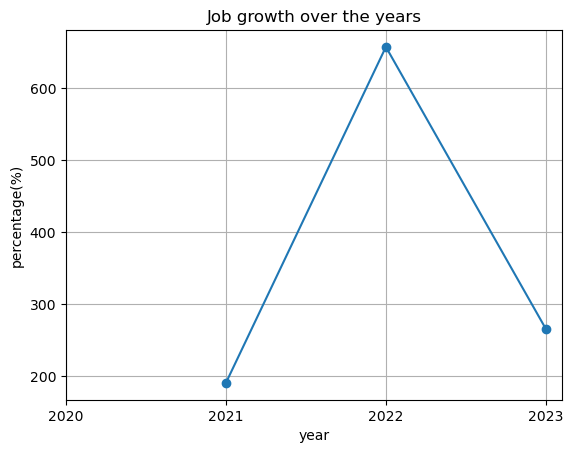

In [20]:
# use in-built function (pct_change)
(work_year.sort_values().to_frame()['work_year'].pct_change() * 100).plot(marker = 'o')
# label chart
plt.xlabel('year')
plt.ylabel('percentage(%)')
plt.title('Job growth over the years')
plt.xticks([2020, 2021, 2022, 2023], ['2020', '2021', '2022', '2023'])
plt.grid();

In [21]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

<AxesSubplot:>

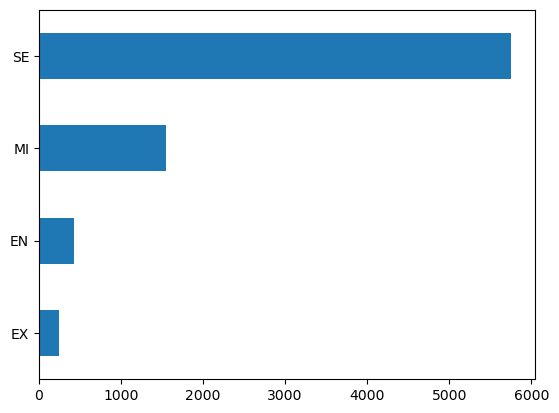

In [22]:
df['experience_level'].value_counts().sort_values().plot(kind = 'barh')

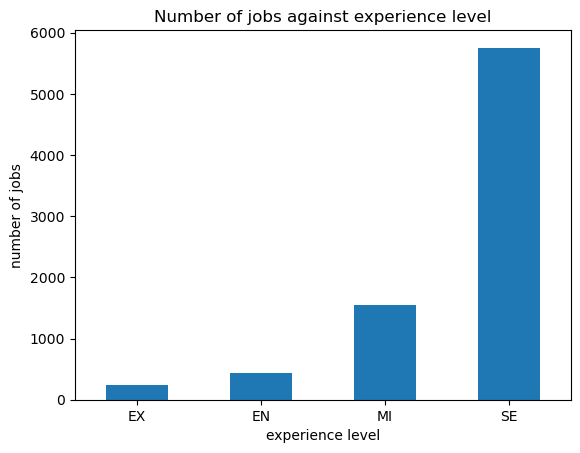

In [23]:
# explore experience level of works
df['experience_level'].value_counts().sort_values().plot.bar()
# label chart
plt.xlabel('experience level')
plt.ylabel('number of jobs')
plt.title('Number of jobs against experience level')
plt.xticks(rotation = 0);

In [24]:
# explore employment type of works
df['employment_type'].value_counts(normalize = True) * 100

FT    99.473288
CT     0.225734
PT     0.163030
FL     0.137948
Name: employment_type, dtype: float64

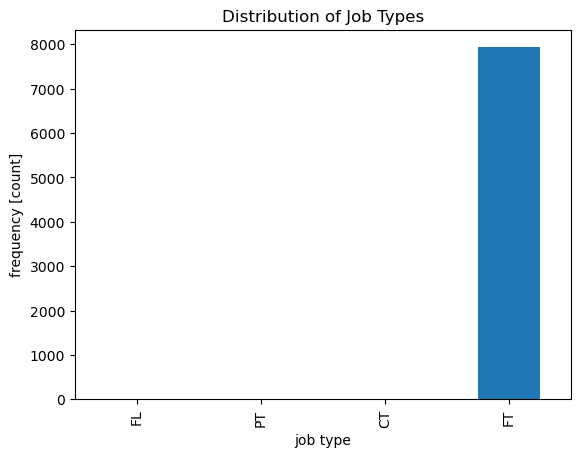

In [25]:
# explore employment type of works
df['employment_type'].value_counts().sort_values().plot.bar()
# label chart
plt.xlabel('job type')
plt.ylabel('frequency [count]')
plt.title('Distribution of Job Types');

In [26]:
# take a glance at the various job titles
df['job_title'].unique()

array(['Business Intelligence Engineer', 'Data Manager', 'Data Scientist',
       'Machine Learning Scientist', 'Analytics Engineer',
       'Data Architect', 'Machine Learning Engineer', 'Data Engineer',
       'Data Analyst', 'Research Scientist', 'Computer Vision Engineer',
       'Applied Scientist', 'Data Visualization Specialist',
       'ML Engineer', 'Research Engineer', 'Data Science Manager',
       'BI Analyst', 'Research Analyst', 'Insight Analyst',
       'Business Intelligence Analyst', 'AI Engineer',
       'Data Integration Specialist', 'Data Science Practitioner',
       'Data Science Engineer', 'Director of Data Science',
       'Data Specialist', 'Data Visualization Engineer', 'Data Modeler',
       'Head of Data', 'ETL Developer', 'BI Developer',
       'Data Analytics Manager', 'Azure Data Engineer',
       'Decision Scientist', 'Machine Learning Infrastructure Engineer',
       'Data Lead', 'Data Developer', 'AI Developer',
       'Principal Data Scientist', 'Data

In [27]:
# explore job titles of various AI works
df['job_title'].value_counts().head(10)

Data Engineer                1888
Data Scientist               1688
Data Analyst                 1188
Machine Learning Engineer     816
Applied Scientist             226
Research Scientist            219
Analytics Engineer            218
Data Architect                179
Data Manager                  128
Research Engineer             123
Name: job_title, dtype: int64

<AxesSubplot:>

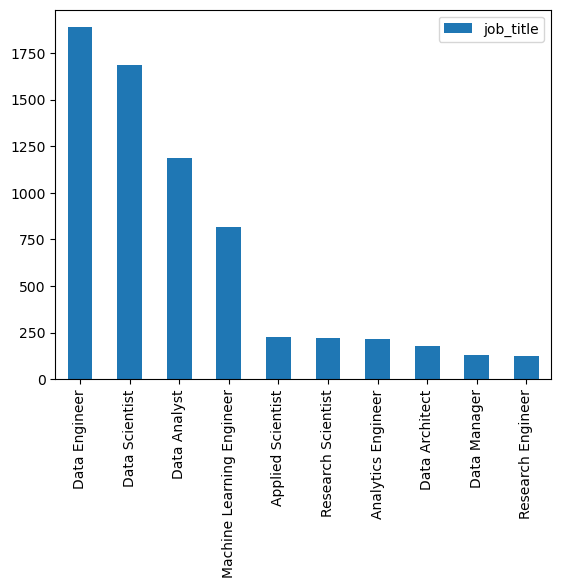

In [28]:
# chaining
df['job_title'].value_counts().to_frame().head(10).plot.bar()

## Masking(Sub-seting)

In [29]:
# masking -- how to subset in python(programming)
df[df['experience_level'] == 'EN']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
20,2023,EN,FT,Data Scientist,18000,EUR,19434,GR,100,GR,L
27,2023,EN,FT,Data Analyst,80000,USD,80000,US,0,US,M
28,2023,EN,FT,Data Analyst,50000,USD,50000,US,0,US,M
83,2023,EN,FT,Data Engineer,130916,USD,130916,US,0,US,M
84,2023,EN,FT,Data Engineer,120000,USD,120000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7931,2020,EN,PT,Data Scientist,19000,EUR,21669,IT,50,IT,S
7944,2021,EN,FT,Business Data Analyst,50000,EUR,59102,LU,100,LU,L
7949,2021,EN,FT,AI Scientist,1335000,INR,18053,IN,100,AS,S
7971,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [30]:
d = df[(df['experience_level'] == 'EN') & (df['salary_in_usd'] >= 100_000)]
d

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
83,2023,EN,FT,Data Engineer,130916,USD,130916,US,0,US,M
84,2023,EN,FT,Data Engineer,120000,USD,120000,US,0,US,M
268,2023,EN,FT,Data Engineer,220000,USD,220000,US,0,US,M
269,2023,EN,FT,Data Engineer,187000,USD,187000,US,0,US,M
480,2023,EN,FT,Data Scientist,135000,USD,135000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7790,2021,EN,FT,Machine Learning Scientist,225000,USD,225000,US,100,US,L
7849,2021,EN,FT,Research Scientist,100000,USD,100000,JE,0,CN,L
7855,2021,EN,FT,Data Scientist,100000,USD,100000,US,100,US,M
7971,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [31]:
df[(df['job_title'] == 'Data Scientist') & (df['company_location'] == 'US')]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M
5,2023,SE,FT,Data Scientist,173200,USD,173200,US,0,US,M
6,2023,SE,FT,Data Scientist,235000,USD,235000,US,100,US,M
7,2023,SE,FT,Data Scientist,204000,USD,204000,US,100,US,M
47,2023,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7957,2021,MI,FT,Data Scientist,73000,USD,73000,US,0,US,L
7960,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M
7961,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M
7969,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L


In [77]:
print(f"The maximum salary: {df['salary_in_usd'].max()}")

The maximum salary: 450000


Minimun salary: 15000
Maximun salary: 450000


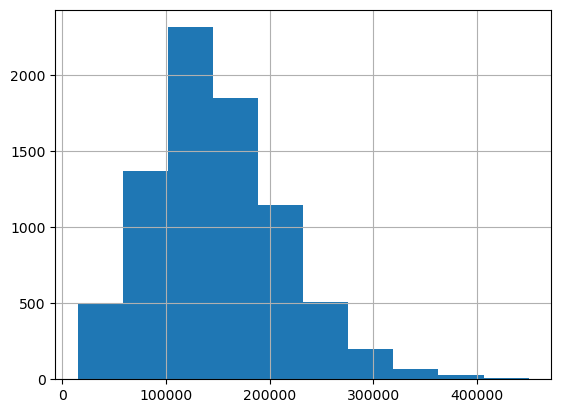

In [33]:
# explore the salaries in USD
print('Minimun salary: {}'.format(df['salary_in_usd'].min()))
print('Maximun salary: {}'.format(df['salary_in_usd'].max()))
df['salary_in_usd'].hist();

In [34]:
df[df['salary_in_usd'] == 15000]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2240,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
4451,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
7079,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
7376,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [35]:
df[df['salary_in_usd'] == 450000]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
7756,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M


In [36]:
# data science roles which are fully remote
df[(df['job_title'] == 'Data Scientist') & (df['remote_ratio'] == 100)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
6,2023,SE,FT,Data Scientist,235000,USD,235000,US,100,US,M
7,2023,SE,FT,Data Scientist,204000,USD,204000,US,100,US,M
20,2023,EN,FT,Data Scientist,18000,EUR,19434,GR,100,GR,L
59,2023,SE,FT,Data Scientist,150000,USD,150000,US,100,US,M
60,2023,SE,FT,Data Scientist,130000,USD,130000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7960,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M
7961,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M
7965,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
7969,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L


In [41]:
df[(df['job_title'] == 'Data Scientist') & (df['company_location'] == 'US')]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M
5,2023,SE,FT,Data Scientist,173200,USD,173200,US,0,US,M
6,2023,SE,FT,Data Scientist,235000,USD,235000,US,100,US,M
7,2023,SE,FT,Data Scientist,204000,USD,204000,US,100,US,M
47,2023,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7957,2021,MI,FT,Data Scientist,73000,USD,73000,US,0,US,L
7960,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M
7961,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M
7969,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L


# Correlation

In [42]:
# bivariate correlation analysis
df['salary_in_usd'].corr(df['remote_ratio'])

-0.09552297237063778

In [44]:
# multivariate correlation analysis
correlation = df.corr()
correlation

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.090180,0.197124,-0.199284
salary,-0.090180,1.000000,0.040149,0.020653
salary_in_usd,0.197124,0.040149,1.000000,-0.095523
remote_ratio,-0.199284,0.020653,-0.095523,1.000000


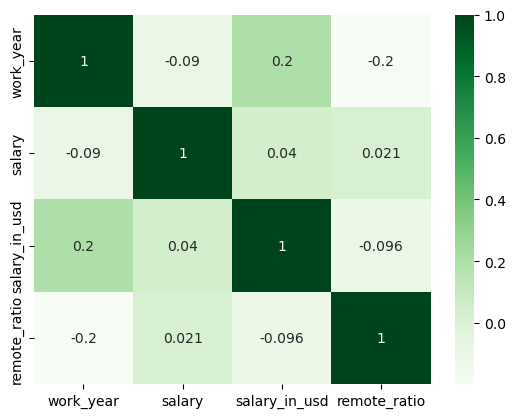

In [49]:
# visualize the correlation
import seaborn as sns
sns.heatmap(correlation, cmap = 'Greens', annot = True);

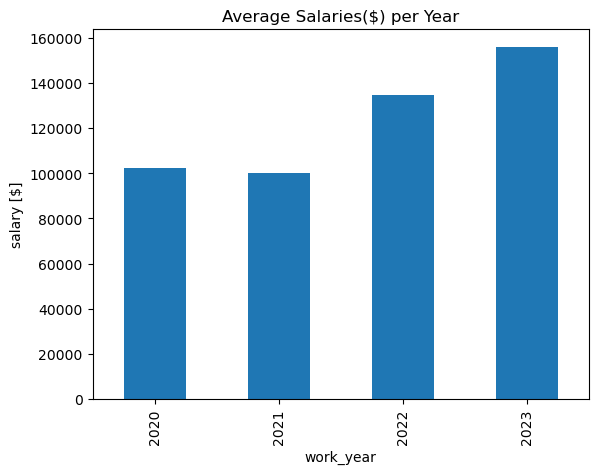

In [62]:
# groupby
x = df.groupby('work_year')['salary_in_usd'].mean()
x.plot(kind = 'bar')

plt.ylabel('salary [$]')
plt.title('Average Salaries($) per Year');

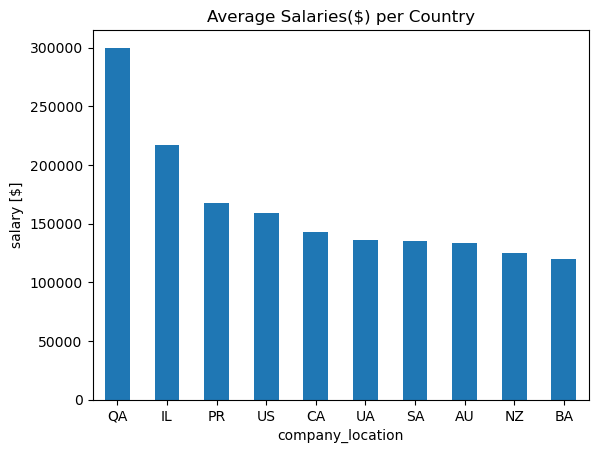

In [71]:
# salaries per country
df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending = False).head(10).plot.bar()

plt.ylabel('salary [$]')
plt.title('Average Salaries($) per Country')
plt.xticks(rotation = 0);

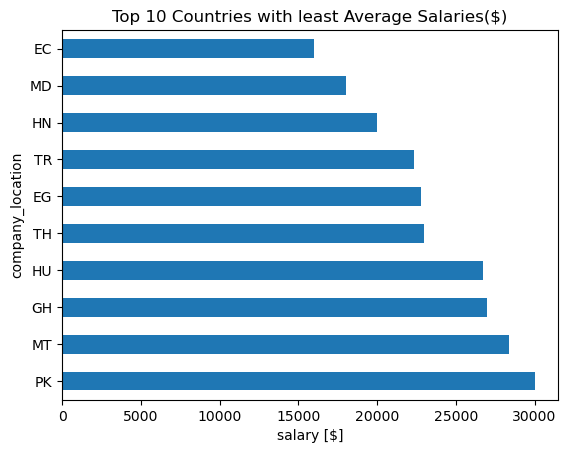

In [90]:
df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending = False).tail(10).plot.barh()

plt.xlabel('salary [$]')
plt.title('Top 10 Countries with least Average Salaries($)');

In [93]:
# aggregate function
df.groupby('company_location').aggregate({'salary_in_usd': 'mean', 'remote_ratio': 'mean', 'work_year': 'count'}).sort_values(ascending = False, by = 'salary_in_usd').head(10)

,salary_in_usd,remote_ratio,work_year
company_location,,,
QA,300000.000000,100.000000,1
IL,217332.000000,66.666667,3
PR,167500.000000,100.000000,4
US,158694.199061,38.132610,6817
CA,142539.519337,55.801105,181
UA,135600.000000,50.000000,5
SA,134999.000000,100.000000,2
AU,133035.043478,45.652174,23
NZ,125000.000000,50.000000,1


In [102]:
(df.groupby('work_year').aggregate({
    'salary_in_usd': ['median', 'mean', 'std', 'min', 'max'], 
    'remote_ratio': 'median',
    'employment_type': 'count'
}))

salary_in_usd                                              \
                 median           mean           std    min     max   
work_year                                                             
2020            79833.0  102250.866667  82722.309481  15000  450000   
2021            83872.0   99922.073394  67072.030451  15000  423000   
2022           132000.0  134508.234545  57671.158376  15000  430967   
2023           148594.0  155808.402255  63656.844429  15680  430640   

          remote_ratio employment_type  
                median           count  
work_year                               
2020              50.0              75  
2021             100.0             218  
2022             100.0            1650  
2023               0.0            6031

In [133]:
(df.groupby('job_title')
 .aggregate({'salary_in_usd': ['mean']})
 .sort_values(ascending = False, by = 'job_title')
 .head(20)
)

,salary_in_usd
,mean
job_title,
Staff Machine Learning Engineer,185000.000000
Staff Data Scientist,134500.000000
Staff Data Analyst,79917.000000
Software Data Engineer,111627.666667
Sales Data Analyst,60000.000000
Research Scientist,181754.940639
Research Engineer,182500.878049
Research Analyst,100471.807692


In [121]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M


In [124]:
df['salary_in_ghc'] = df['salary_in_usd'] * 11.80

In [125]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'salary_in_ghc'],
      dtype='object')

In [126]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_ghc
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L,2393040.0
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L,1230740.0
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M,871123.2
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M,798529.6
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M,3422000.0


In [130]:
df[['salary_in_ghc', 'salary_in_usd']].head()

,salary_in_ghc,salary_in_usd
0,2393040.0,202800
1,1230740.0,104300
2,871123.2,73824
3,798529.6,67672
4,3422000.0,290000
